In [194]:
import numpy as np
import scipy.optimize as opt
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pandas as pd

## 1

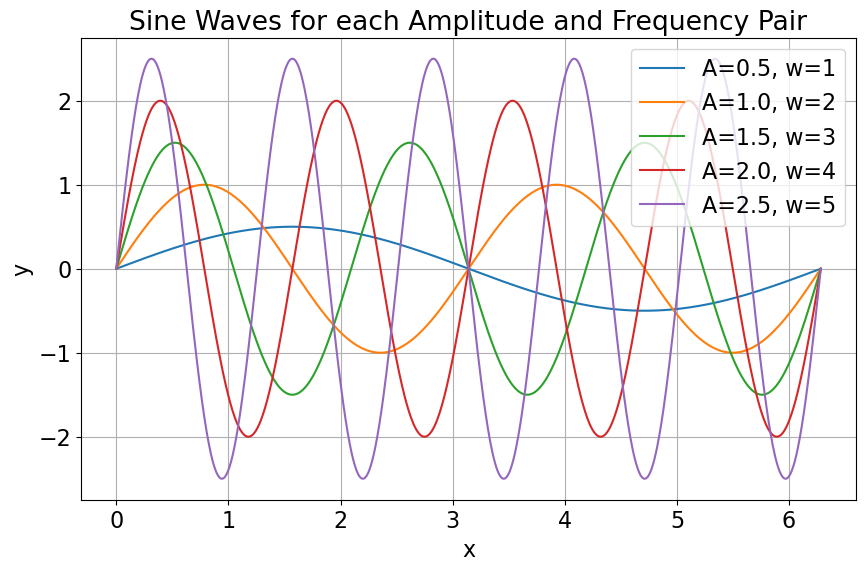

In [195]:
x = np.linspace(0, 2 * np.pi, 1000)
A_vals = np.array([0.5, 1, 1.5, 2, 2.5])
w_vals = np.array([1, 2, 3, 4, 5])

def make_sine_wave(x, A, w):
    return A*np.sin(w*x)

plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': '16'})

for A, w in zip(A_vals, w_vals):
    y = make_sine_wave(x, A, w)
    plt.plot(x, y, label=f"A={A}, w={w}")

plt.title("Sine Waves for each Amplitude and Frequency Pair")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

## 2

In [196]:
file= pd.read_csv('/Users/avivafranklin/Desktop/stars.csv')
print(file.head(5))

               Name  Distance (ly)  Mass (M☉)  Radius (R☉)  Temperature (K)  \
0  Proxima Centauri           4.24       0.12         0.14             3042   
1  Alpha Centauri A           4.37       1.10         1.22             5790   
2  Alpha Centauri B           4.37       0.91         0.86             5260   
3    Barnard's Star           5.96       0.16         0.20             3134   
4          Wolf 359           7.86       0.09         0.16             2800   

  Spectral_Type  
0        M5.5Ve  
1           G2V  
2           K1V  
3          M4Ve  
4        M6.5Ve  


In [197]:
rows, cols = file.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 10
Number of columns: 6


In [198]:
print(file.dtypes)

Name                object
Distance (ly)      float64
Mass (M☉)          float64
Radius (R☉)        float64
Temperature (K)      int64
Spectral_Type       object
dtype: object


In [199]:
def average_value(column):
    return file[column].mean()

print(f"The average mass is: {average_value('Mass (M☉)')}")
print(f"The average temperature is: {average_value('Temperature (K)')}")

The average mass is: 0.579
The average temperature is: 6370.6


In [200]:
max_index = file['Radius (R☉)'].idxmax()
max_name = file.loc[max_index, 'Name']
print(f'The star with the larggest radius is {max_name}')

The star with the larggest radius is Sirius A


In [201]:
m_type = file['Spectral_Type'].str.startswith('M').sum()
print(f'there are {m_type} m-type stars')

there are 6 m-type stars


In [202]:
sorted_dist = file.sort_values(by="Distance (ly)").head(3)
print(sorted_dist['Name'])

0    Proxima Centauri
1    Alpha Centauri A
2    Alpha Centauri B
Name: Name, dtype: object


In [203]:
m_type_stars = file[file["Spectral_Type"].str.startswith("M")]
m_type_stars.to_csv("m type stars.csv", index=False)
df= pd.read_csv('m type stars.csv')
print(df)

               Name  Distance (ly)  Mass (M☉)  Radius (R☉)  Temperature (K)  \
0  Proxima Centauri           4.24       0.12         0.14             3042   
1    Barnard's Star           5.96       0.16         0.20             3134   
2          Wolf 359           7.86       0.09         0.16             2800   
3     Luyten 726-8A           8.73       0.10         0.14             2700   
4     Luyten 726-8B           8.73       0.10         0.12             2600   
5          Ross 154           9.68       0.17         0.24             3240   

  Spectral_Type  
0        M5.5Ve  
1          M4Ve  
2        M6.5Ve  
3        M5.5Ve  
4          M6Ve  
5        M3.5Ve  


## 3

In [204]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
print(penguins)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

/var/folders/sy/r1jfn5p14tb4r8xhjqg4jdk80000gn/T/ipykernel_7344/2136516316.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


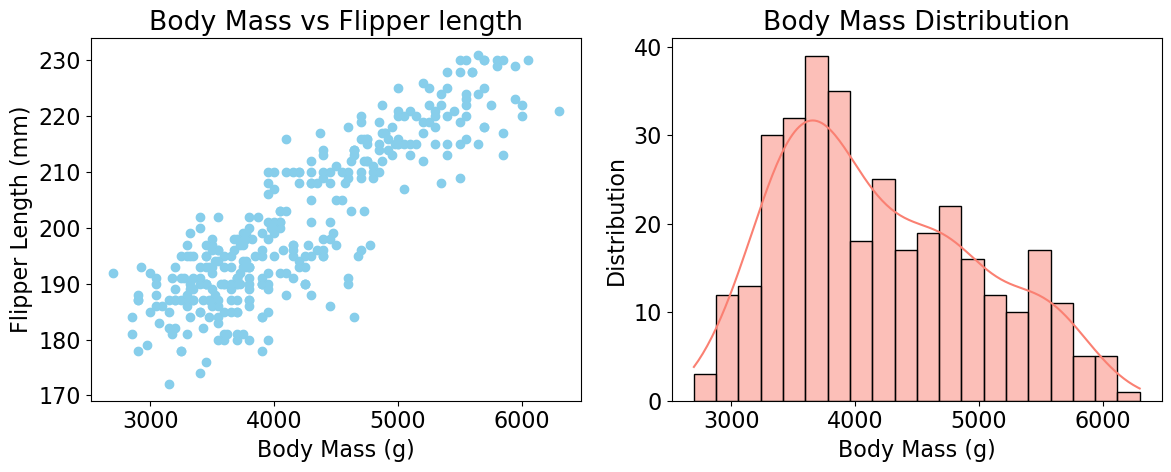

In [205]:
df = penguins.dropna(subset=["body_mass_g", "flipper_length_mm", "bill_length_mm"])
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.scatterplot(
    data=penguins,
    x="body_mass_g",
    y="flipper_length_mm",
    ax=axes[0],
    palette="Set2")

axes[0].scatter(df["body_mass_g"], df["flipper_length_mm"], color="skyblue")
axes[0].set_title("Body Mass vs Flipper length")
axes[0].set_xlabel("Body Mass (g)")
axes[0].set_ylabel("Flipper Length (mm)")

sns.histplot(
    data=penguins,
    x="body_mass_g",
    bins=20,
    kde=True,
    color="salmon",
    ax=axes[1])

axes[1].set_title("Body Mass Distribution")
axes[1].set_xlabel("Body Mass (g)")
axes[1].set_ylabel("Distribution")

plt.tight_layout()
plt.show()